## Importing libraries

In [1]:
# Default libs
import pandas as pd
import matplotlib.pyplot as plt

# Train
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Codification  
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel('ProcessedGamesInfo.xlsx')

In [3]:
df.drop(columns='ratings_numbers')

display(df)

,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
0,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Action Adventure
1,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Fantasy
2,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Sports
3,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Alternative
4,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Skateboarding
...,...,...,...,...,...,...,...,...,...,...
64558,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),Action Adventure
64559,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),General
64560,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,12/04/2012,Wii U,11,8,2.7,195,"Art Co., Ltd.",No Online Multiplayer,Miscellaneous
64561,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,12/04/2012,Wii U,11,8,2.7,195,"Art Co., Ltd.",No Online Multiplayer,Party


### Tests

In [3]:
# genre title 

df1 = df.drop_duplicates('title', keep='first')
df2 = df.drop_duplicates('title', keep='last')

display(df1, df2)

,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
0,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Action Adventure
2,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Sports
5,GRAND THEFT AUTO IV,04/29/2008,PlayStation 3,98,64,7.8,4811,Rockstar North,1 Player,Action Adventure
8,SOULCALIBUR,09/08/1999,Dreamcast,98,24,8.4,404,Namco,1-2,Action
14,SUPER MARIO GALAXY,11/12/2007,Wii,97,73,9.1,3795,Nintendo,No Online Multiplayer,Action
...,...,...,...,...,...,...,...,...,...,...
64534,SPOGS RACING,07/07/2008,Wii,18,7,3.7,22,Pronto Games,1-2 Player(s),Driving
64538,DOUBLE DRAGON II: WANDER OF THE DRAGONS,04/05/2013,Xbox 360,17,19,1.6,59,Gravity Corporation,1-2 Player(s),Action
64541,VROOM IN THE NIGHT SKY,04/05/2017,Switch,17,15,3.3,109,Poisoft,No Online Multiplayer,Sports
64549,YARIS,10/10/2007,Xbox 360,17,7,4.4,136,Backbone Entertainment,2 Online,Driving


,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
1,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Fantasy
16,SUPER MARIO GALAXY,11/12/2007,Wii,97,73,9.1,3795,Nintendo,No Online Multiplayer,3D
19,SUPER MARIO GALAXY 2,05/23/2010,Wii,97,87,9.1,2942,Nintendo EAD Tokyo,No Online Multiplayer,3D
54,METROID PRIME,11/17/2002,GameCube,97,70,8.9,1402,Retro Studios,1 Player,Sci-Fi
59,SUPER MARIO ODYSSEY,10/27/2017,Switch,97,113,8.9,7165,Nintendo,No Online Multiplayer,3D
...,...,...,...,...,...,...,...,...,...,...
64543,VROOM IN THE NIGHT SKY,04/05/2017,Switch,17,15,3.3,109,Poisoft,No Online Multiplayer,Biking
64548,LEISURE SUIT LARRY: BOX OFFICE BUST,05/05/2009,PlayStation 3,17,11,1.9,47,Team17,No Online Multiplayer,Modern
64552,YARIS,10/10/2007,Xbox 360,17,7,4.4,136,Backbone Entertainment,2 Online,Automobile
64559,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),General


## Droping columns

In [4]:
df = df.drop(['release', 'players_number', 'ratings_numbers', 'critic_reviews'], axis=1)

display(df1)
print(df.shape)

,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
0,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Action Adventure
2,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Sports
5,GRAND THEFT AUTO IV,04/29/2008,PlayStation 3,98,64,7.8,4811,Rockstar North,1 Player,Action Adventure
8,SOULCALIBUR,09/08/1999,Dreamcast,98,24,8.4,404,Namco,1-2,Action
14,SUPER MARIO GALAXY,11/12/2007,Wii,97,73,9.1,3795,Nintendo,No Online Multiplayer,Action
...,...,...,...,...,...,...,...,...,...,...
64534,SPOGS RACING,07/07/2008,Wii,18,7,3.7,22,Pronto Games,1-2 Player(s),Driving
64538,DOUBLE DRAGON II: WANDER OF THE DRAGONS,04/05/2013,Xbox 360,17,19,1.6,59,Gravity Corporation,1-2 Player(s),Action
64541,VROOM IN THE NIGHT SKY,04/05/2017,Switch,17,15,3.3,109,Poisoft,No Online Multiplayer,Sports
64549,YARIS,10/10/2007,Xbox 360,17,7,4.4,136,Backbone Entertainment,2 Online,Driving


(64563, 6)


## Codification

In [5]:
le_title = LabelEncoder()

# Aplicating the LabelEncoding in column "genre_split"
df['title'] = le_title.fit_transform(df['title'])

In [6]:
le_genre = LabelEncoder()

# Aplicating the ding in column "genre_split"
df['genre_split'] = le_genre.fit_transform(df['genre_split'])

In [7]:
'''le_release = LabelEncoder()

# Aplicating the LabelEncoding in column "release"
df['release'] = le_release.fit_transform(df['release'])'''

'le_release = LabelEncoder()\n\n# Aplicating the LabelEncoding in column "release"\ndf[\'release\'] = le_release.fit_transform(df[\'release\'])'

In [8]:
le_plat = LabelEncoder()

# Aplicating the LabelEncoding in column "plataform"
df['plataform'] = le_plat.fit_transform(df['plataform'])

In [9]:
le_developer = LabelEncoder()

# Aplicating the LabelEncoding in column "developer"
df['developer'] = le_developer.fit_transform(df['developer'])

In [10]:
df

,title,plataform,metascore,user_score,developer,genre_split
0,10252,5,99,9.1,2165,174
1,10252,5,99,9.1,2165,44
2,10808,8,98,7.4,2132,224
3,10808,8,98,7.4,2132,8
4,10808,8,98,7.4,2132,124
...,...,...,...,...,...,...
64558,8068,6,16,1.4,1035,5
64559,8068,6,16,1.4,1035,56
64560,3370,17,11,2.7,211,204
64561,3370,17,11,2.7,211,100


## Convert to original format

In [11]:
df

,title,plataform,metascore,user_score,developer,genre_split
0,10252,5,99,9.1,2165,174
1,10252,5,99,9.1,2165,44
2,10808,8,98,7.4,2132,224
3,10808,8,98,7.4,2132,8
4,10808,8,98,7.4,2132,124
...,...,...,...,...,...,...
64558,8068,6,16,1.4,1035,5
64559,8068,6,16,1.4,1035,56
64560,3370,17,11,2.7,211,204
64561,3370,17,11,2.7,211,100


# Training and testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('metascore', axis=1), df['metascore'], test_size=0.2)

# Models

## Linear Regression

In [13]:
# instanciar o modelo de Regressão Linear
regressor = LinearRegression()

# treinar o modelo com os dados de treinamento
regressor.fit(X_train, y_train)

# fazer previsões com os dados de teste
y_pred_lr = regressor.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test, y_pred_lr)

print("MAE: ", mae)

MAE:  8.119340185782622


## Random Forest

In [15]:
# Create a model
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Train the model with training data
clf.fit(X_train, y_train)

# Make predictions using test data
y_pred_rf = clf.predict(X_test)

In [16]:
# Accuracy

accuracy = accuracy_score(y_test, y_pred_rf)

print("Accuracy:", round(accuracy,4))


import numpy as np

np.sqrt(mean_squared_error(y_test, y_pred_rf))

Accuracy: 0.9261


3.1591660133808532

In [17]:
# Precion

precision = precision_score(y_test, y_pred_rf, pos_label='positive', average='macro')

print('Precision: %.4f' % precision)

Precision: 0.9448


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


## Decision Tree Classifier

In [18]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [19]:
# Accuracy 

acc_dtc = accuracy_score(y_test, y_pred)

print('Accuracy:', round(acc_dtc,4))

Accuracy: 0.9027


In [20]:
# Precision

precision = precision_score(y_test, y_pred, pos_label='positive', average='macro')

print('Precision: %.4f' % precision)

Precision: 0.9244


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


## Converting encoding

In [21]:
X_test['plataform'] = le_plat.inverse_transform(X_test['plataform'])
X_test['developer'] = le_developer.inverse_transform(X_test['developer'])
X_test['title'] = le_title.inverse_transform(X_test['title'])
X_test['genre_split'] = le_genre.inverse_transform(X_test['genre_split'])

In [22]:
X_train['plataform'] = le_plat.inverse_transform(X_train['plataform'])
X_train['developer'] = le_developer.inverse_transform(X_train['developer'])
X_train['title'] = le_title.inverse_transform(X_train['title'])
X_train['genre_split'] = le_genre.inverse_transform(X_train['genre_split'])

## Data frame analysis

In [23]:
X_train['y_train'] = pd.Series(y_train)

X_train.sort_index()

,title,plataform,user_score,developer,genre_split,y_train
0,THE LEGEND OF ZELDA: OCARINA OF TIME,Nintendo 64,9.1,Nintendo,Action Adventure,99
1,THE LEGEND OF ZELDA: OCARINA OF TIME,Nintendo 64,9.1,Nintendo,Fantasy,99
3,TONY HAWK'S PRO SKATER 2,PlayStation,7.4,Neversoft Entertainment,Alternative,98
4,TONY HAWK'S PRO SKATER 2,PlayStation,7.4,Neversoft Entertainment,Skateboarding,98
5,GRAND THEFT AUTO IV,PlayStation 3,7.8,Rockstar North,Action Adventure,98
...,...,...,...,...,...,...
64557,RIDE TO HELL: RETRIBUTION,PC,1.4,Eutechnyx,Motocross,16
64558,RIDE TO HELL: RETRIBUTION,PC,1.4,Eutechnyx,Action Adventure,16
64559,RIDE TO HELL: RETRIBUTION,PC,1.4,Eutechnyx,General,16
64560,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,Wii U,2.7,"Art Co., Ltd.",Miscellaneous,11


In [40]:
X_test['y_test'] = pd.Series(y_test)
X_test['y_pred'] = pd.Series(y_pred_rf)

display(X_test.sort_index().head(10))
print(X_test.shape)

,title,plataform,user_score,developer,genre_split,y_test,y_pred
2,TONY HAWK'S PRO SKATER 2,PlayStation,7.4,Neversoft Entertainment,Sports,98,76.0
12,GRAND THEFT AUTO IV,Xbox 360,8.0,Rockstar North,Modern,98,81.0
13,GRAND THEFT AUTO IV,Xbox 360,8.0,Rockstar North,Open-World,98,65.0
18,SUPER MARIO GALAXY 2,Wii,9.1,Nintendo EAD Tokyo,Platformer,97,55.0
33,GRAND THEFT AUTO V,Xbox 360,8.3,Rockstar North,Action Adventure,97,74.0
36,TONY HAWK'S PRO SKATER 2,Dreamcast,6.2,Treyarch,Sports,97,71.0
43,TONY HAWK'S PRO SKATER 3,PlayStation 2,7.5,Neversoft Entertainment,Skateboarding,97,77.0
49,GRAND THEFT AUTO V,PlayStation 4,8.3,Rockstar North,Modern,97,60.0
58,SUPER MARIO ODYSSEY,Switch,8.9,Nintendo,Platformer,97,68.0
62,HALO: COMBAT EVOLVED,Xbox,8.7,Bungie Software,First-Person,97,84.0


(12913, 7)


In [37]:
X_test[X_test.y_pred <= 40]

,title,plataform,user_score,developer,genre_split,y_test,y_pred
5070,TRIALS HD,Xbox 360,8.5,RedLynx,Automobile,86,36.0
11140,SHIFT 2: UNLEASHED,Xbox 360,6.7,Slightly Mad Studios,Automobile,82,33.0
4928,TRANSISTOR,Switch,8.0,Supergiant Games,Action RPG,86,39.0
4684,TOTAL WAR: SHOGUN 2 - FALL OF THE SAMURAI,PC,8.4,Creative Assembly,Turn-Based,86,38.0
6470,TONY HAWK'S PRO SKATER 4,Game Boy Advance,6.1,Vicarious Visions,Alternative,85,39.0
1317,WORLD SOCCER WINNING ELEVEN 8 INTERNATIONAL,PlayStation 2,8.3,KCET,Soccer,91,40.0
10412,NCAA FOOTBALL 09,Xbox 360,7.7,EA Tiburon,Team,83,32.0
971,MEDAL OF HONOR: ALLIED ASSAULT,PC,8.5,2015,Shooter,91,33.0
1899,BEETLE ADVENTURE RACING,Nintendo 64,7.7,Paradigm Entertainment,Arcade,90,25.0
9202,SPLATOON 3,Switch,6.8,Nintendo,Action,83,37.0


### Graphs

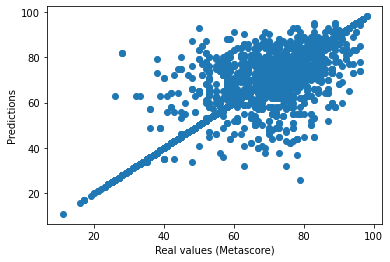

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel("Real values (Metascore)")
plt.ylabel("Predictions")
plt.show()

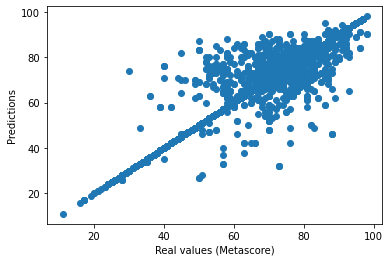

In [27]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Real values (Metascore)")
plt.ylabel("Predictions")
plt.show()